In [21]:
##For the first time install packages that contain all the datasets
# install.packages("MASS")
# install.packages("ISLR")
library(MASS)
library(ISLR)

### Q8. 

This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US. The variables are:

• Private : Public/private indicator <br>
• Apps : Number of applications received <br>
• Accept : Number of applicants accepted <br>
• Enroll : Number of new students enrolled <br>
• Top10perc : New students from top 10 % of high school class <br>
• Top25perc : New students from top 25 % of high school class <br>
• F.Undergrad : Number of full-time undergraduates <br>
• P.Undergrad : Number of part-time undergraduates <br>
• Outstate : Out-of-state tuition <br>
• Room.Board : Room and board costs <br>
• Books : Estimated book costs <br>
• Personal : Estimated personal spending <br>
• PhD : Percent of faculty with Ph.D.’s <br>
• Terminal : Percent of faculty with terminal degree <br>
• S.F.Ratio : Student/faculty ratio <br>
• perc.alumni : Percent of alumni who donate <br>
• Expend : Instructional expenditure per student <br>
• Grad.Rate : Graduation rate <br>

Before reading the data into R, it can be viewed in Excel or a text editor.

(a) Use the ```read.csv()``` function to read the data into ```R```. <br> 
Call the loaded data college. Make sure that you have the directory set to the correct location for the data.

In [23]:
# Check directory
getwd()
# For convince, I directly use data from ISLR package
# college = read.csv("../data/College.csv")
names(College)
college = College
names(college)

[1] "/Users/min/Dropbox/05.Courses/ML_for_Economist/01.MOOC-An Introduction to Statistical Learning with Applications in R/Ethan"

[1] "Private"     "Apps"        "Accept"      "Enroll"      "Top10perc"  
 [6] "Top25perc"   "F.Undergrad" "P.Undergrad" "Outstate"    "Room.Board" 
[11] "Books"       "Personal"    "PhD"         "Terminal"    "S.F.Ratio"  
[16] "perc.alumni" "Expend"      "Grad.Rate"

[1] "Private"     "Apps"        "Accept"      "Enroll"      "Top10perc"  
 [6] "Top25perc"   "F.Undergrad" "P.Undergrad" "Outstate"    "Room.Board" 
[11] "Books"       "Personal"    "PhD"         "Terminal"    "S.F.Ratio"  
[16] "perc.alumni" "Expend"      "Grad.Rate"

(b) Look at the data using the ```fix()``` function. You should notice that the first column is just the name of each university. We don’t really want ```R``` to treat this as data. However, it may be handy to have these names for later. Try the following commands: <br>
 ```rownames(college)=college[,1]``` <br>
 ```fix(college)``` <br>
You should see that there is now a ```row.names``` column with the name of each university recorded. This means that R has given each row a name corresponding to the appropriate university. R will not try to perform calculations on the row names. However, we still need to eliminate the first column in the data where the names are stored. Try <br>
```college=college[,-1]``` <br>
```fix(college)``` <br>
Now you should see that the first data column is ```Private```. Note that another column labeled ```row.names``` now appears before the ```Private``` column. However, this is not a data column but rather the name that ```R``` is giving to each row.

In [26]:
# Does not apply here
# rownames(college) = college[,1]
# college = college[,-1]

(c) Basic Stats <br>
i. Use the ```summary()``` function to produce a numerical summary of the variables in the data set.

In [27]:
summary(college)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

ii. Use the ```pairs()``` function to produce a scatterplot matrix of the first ten columns or variables of the data. Recall that you can reference the first ten columns of a matrix A using ```A[,1:10]```.

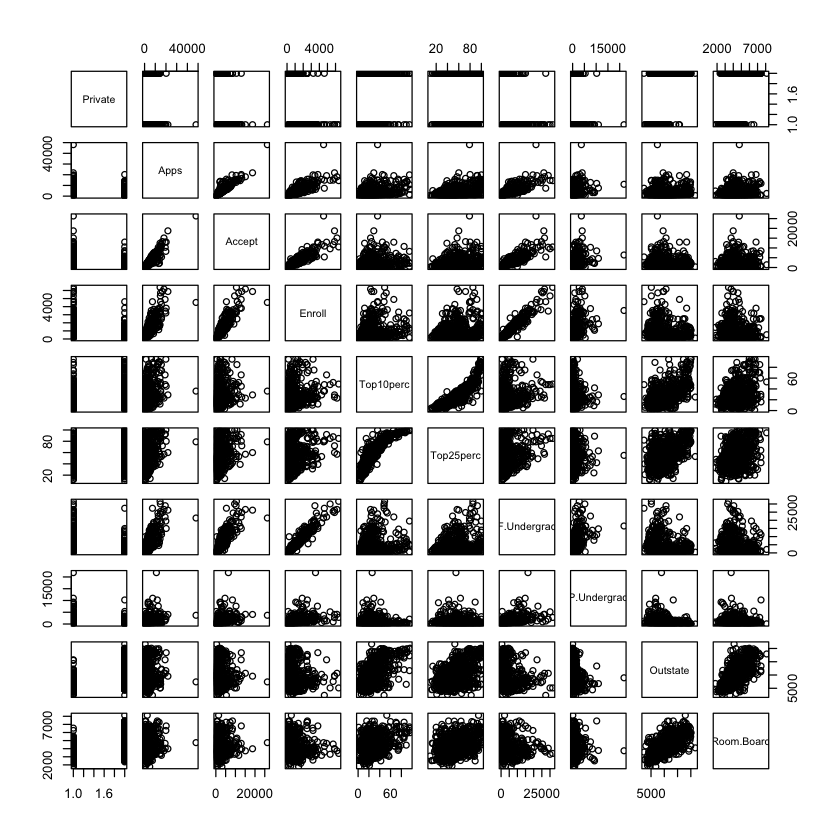

In [28]:
pairs(college[,1:10])

iii. Use the ```plot()``` function to produce side-by-side boxplots of Outstate versus Private.

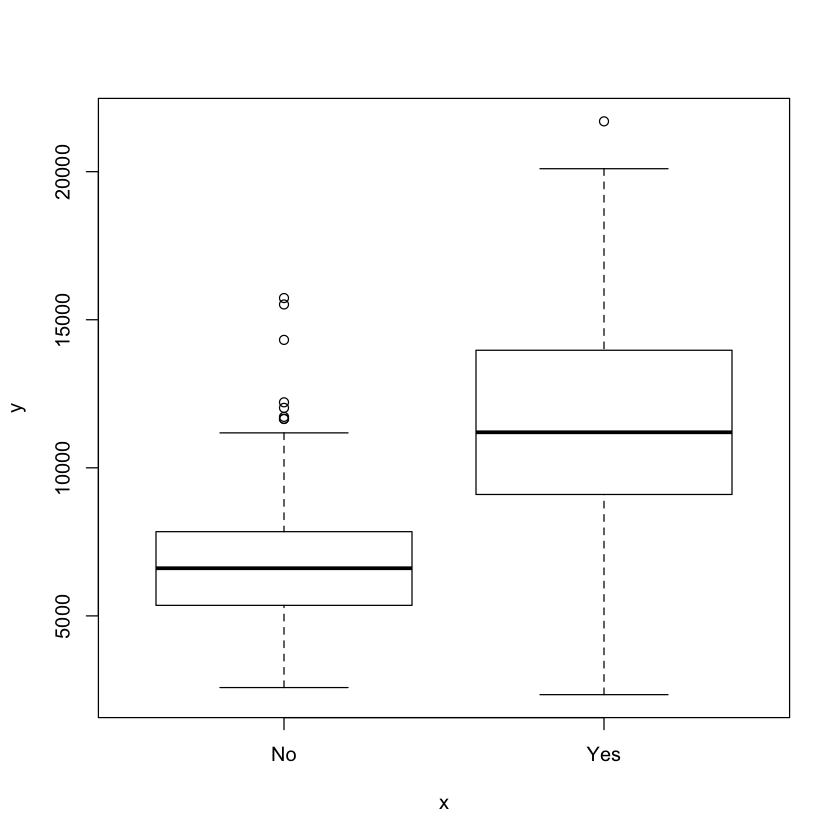

In [29]:
plot(college$Private,college$Outstate)

iv. Create a new qualitative variable, called ```Elite```, by binning the ```Top10perc``` variable. We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50 %. <br>

Use the ```summary()``` function to see how many elite universities there are. Now use the ```plot()``` function to produce side-by-side boxplots of ```Outstate``` versus ```Elite```.

No Yes 
699  78

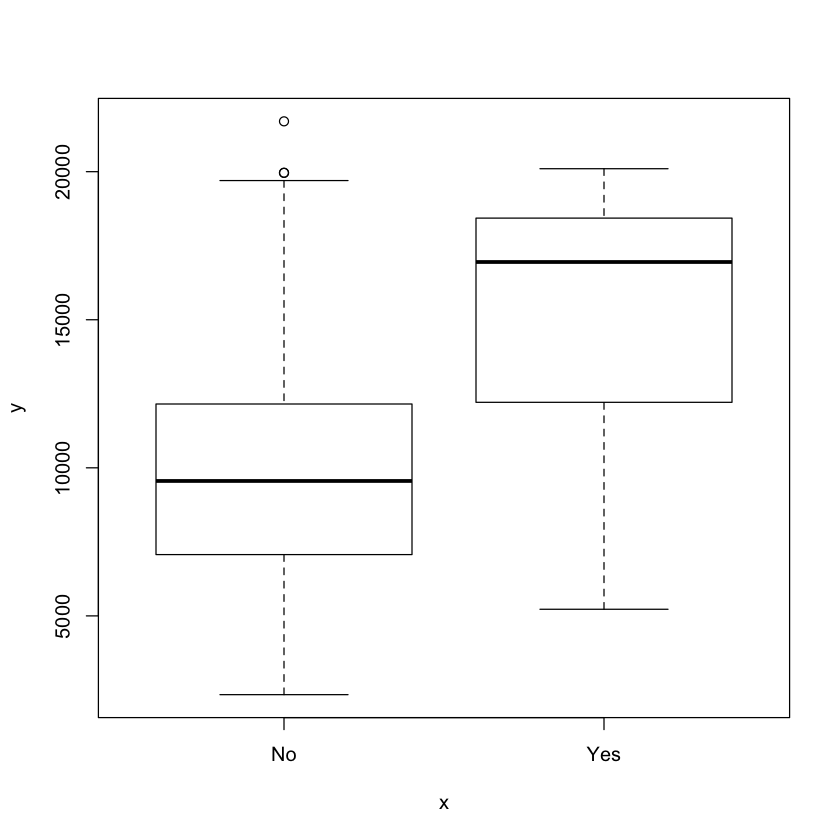

In [31]:
Elite = rep("No", nrow(college))
Elite[college$Top10perc>50] = "Yes"
Elite = as.factor(Elite)
college = data.frame(college, Elite)
summary(college$Elite)
plot(college$Elite, college$Outstate)

v. Use the ```hist()``` function to produce some histograms with differing numbers of bins for a few of the quantitative vari- ables. You may find the command ```par(mfrow=c(2,2))``` useful: it will divide the print window into four regions so that four plots can be made simultaneously. Modifying the arguments to this function will divide the screen in other ways.

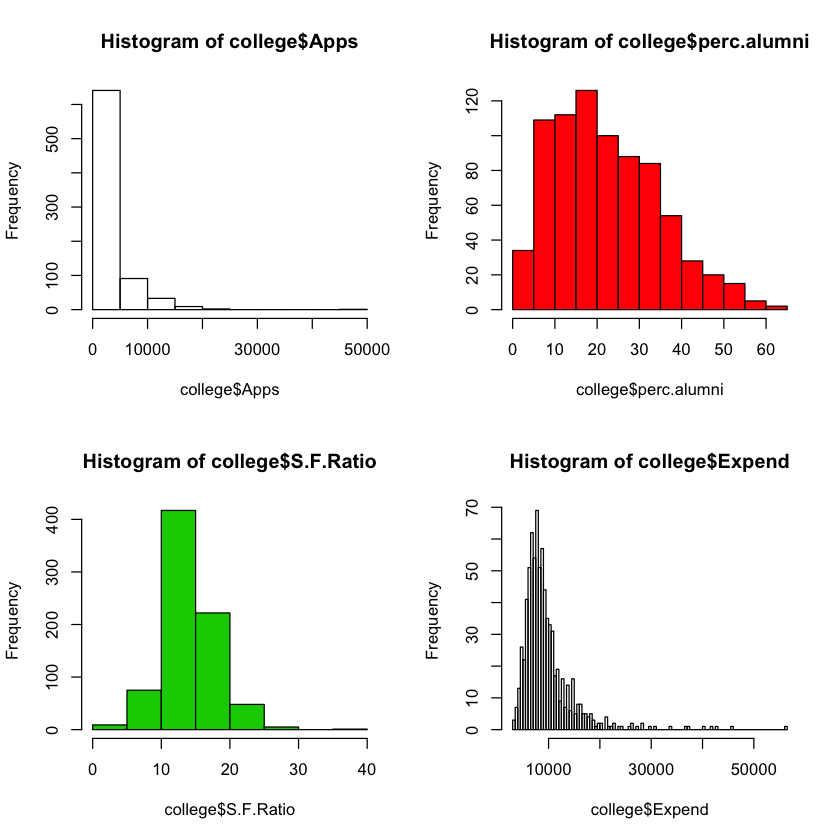

In [32]:
par(mfrow=c(2,2))
hist(college$Apps)
hist(college$perc.alumni, col=2)
hist(college$S.F.Ratio, col=3, breaks=10)
hist(college$Expend, breaks=100)

### Q9. 

This exercise involves the ```Auto``` data set studied in the lab. Make sure that the missing values have been removed from the data.

(a) Which of the predictors are quantitative, and which are quali- tative?

In [33]:
dim(Auto)
summary(Auto)
# Seems only origin & name are qualitative

[1] 392   9

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

(b) What is the range of each quantitative predictor? You can answer this using the ```range()``` function.

In [34]:
# apply the range function to the first seven columns (quant vars)
sapply(Auto[, 1:7], range)

mpg,cylinders,displacement,horsepower,weight,acceleration,year
9.0,3,68,46,1613,8.0,70
46.6,8,455,230,5140,24.8,82


(c) What is the mean and standard deviation of each quantitative predictor?

In [36]:
sapply(Auto[, 1:7], mean)
sapply(Auto[, 1:7], sd)

mpg    cylinders displacement   horsepower       weight acceleration 
   23.445918     5.471939   194.411990   104.469388  2977.584184    15.541327 
        year 
   75.979592

mpg    cylinders displacement   horsepower       weight acceleration 
    7.805007     1.705783   104.644004    38.491160   849.402560     2.758864 
        year 
    3.683737

(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [37]:
# Subset & check if subseting is correct
Auto_prime = Auto[-(10:85),]
dim(Auto_prime) == dim(Auto) - c(76,0)
Auto_prime[9,] == Auto[9,]
Auto_prime[10,] == Auto[86,]
# Summary
sapply(Auto_prime[, 1:7], range)
sapply(Auto_prime[, 1:7], mean)
sapply(Auto_prime[, 1:7], sd)

[1] TRUE TRUE

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
9,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
87,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


mpg,cylinders,displacement,horsepower,weight,acceleration,year
11.0,3,68,46,1649,8.5,70
46.6,8,455,230,4997,24.8,82


mpg    cylinders displacement   horsepower       weight acceleration 
   24.404430     5.373418   187.240506   100.721519  2935.971519    15.726899 
        year 
   77.145570

mpg    cylinders displacement   horsepower       weight acceleration 
    7.867283     1.654179    99.678367    35.708853   811.300208     2.693721 
        year 
    3.106217

(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

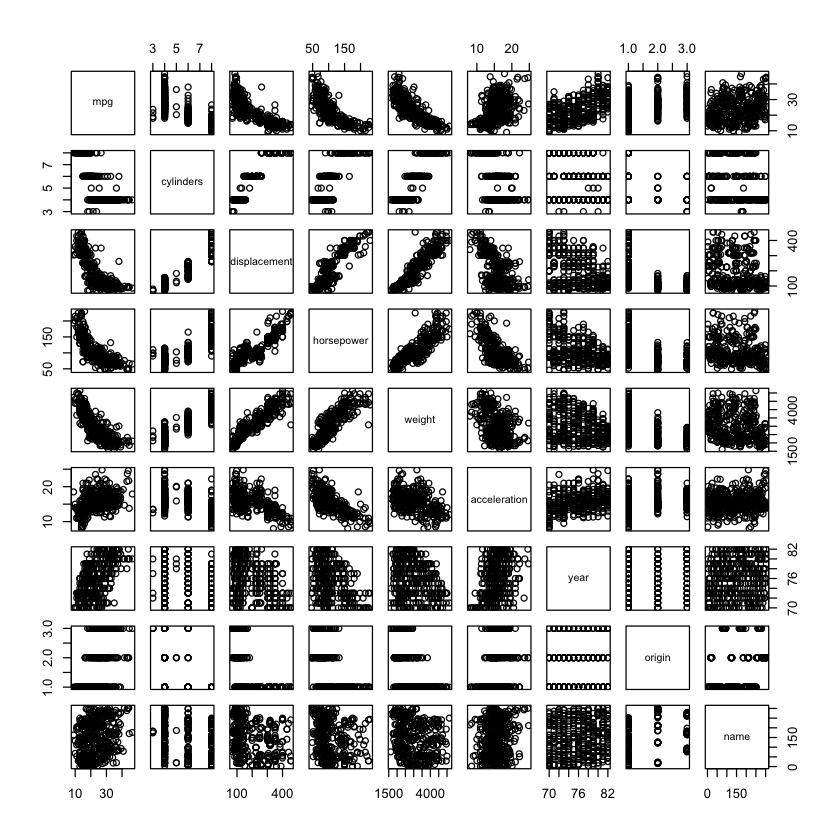

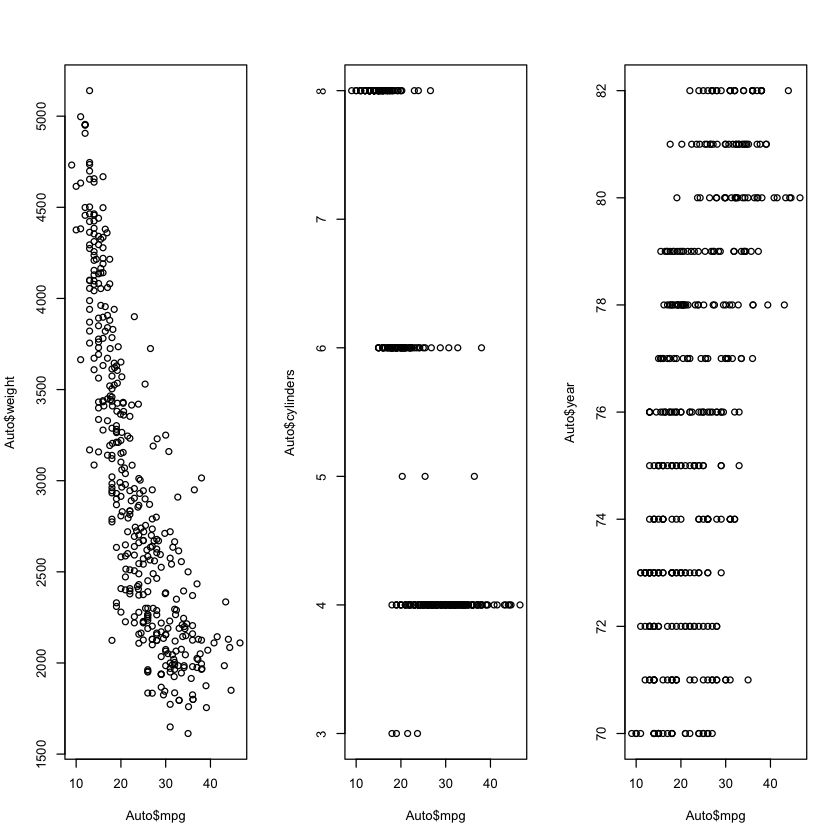

In [52]:
pairs(Auto)
par(mfrow=c(1,3))
plot(Auto$mpg, Auto$weight)
plot(Auto$mpg, Auto$cylinders)
plot(Auto$mpg, Auto$year)

(f) Suppose that we wish to predict gas mileage (```mpg```) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting ```mpg```? Justify your answer.

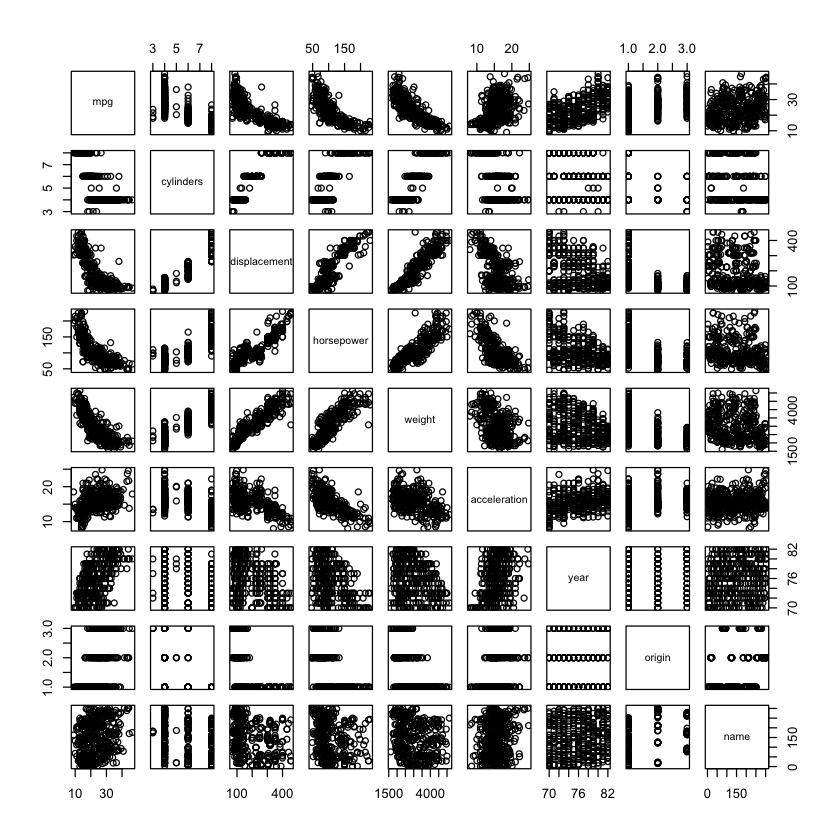

In [42]:
pairs(Auto)
# Check first ROW. All of the quantitative predictors (2-7 col) 
# show some correlation with mpg. 

### Q10.
This exercise involves the ```Boston``` housing data set. <br>
(a) To begin, load in the ```Boston``` data set. The ```Boston``` data set is part of the ```MASS``` library in ```R```. <br>
```library(MASS)``` <br>
Now the data set is contained in the object Boston. <br>
```Boston``` <br>
Read about the data set: <br>
```?Boston``` <br>
How many rows are in this data set? How many columns? What do the rows and columns represent?

In [44]:
library(MASS)
?Boston
dim(Boston)
# 506 rows (housing values), 14 columns (features)

[1] 506  14

(b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

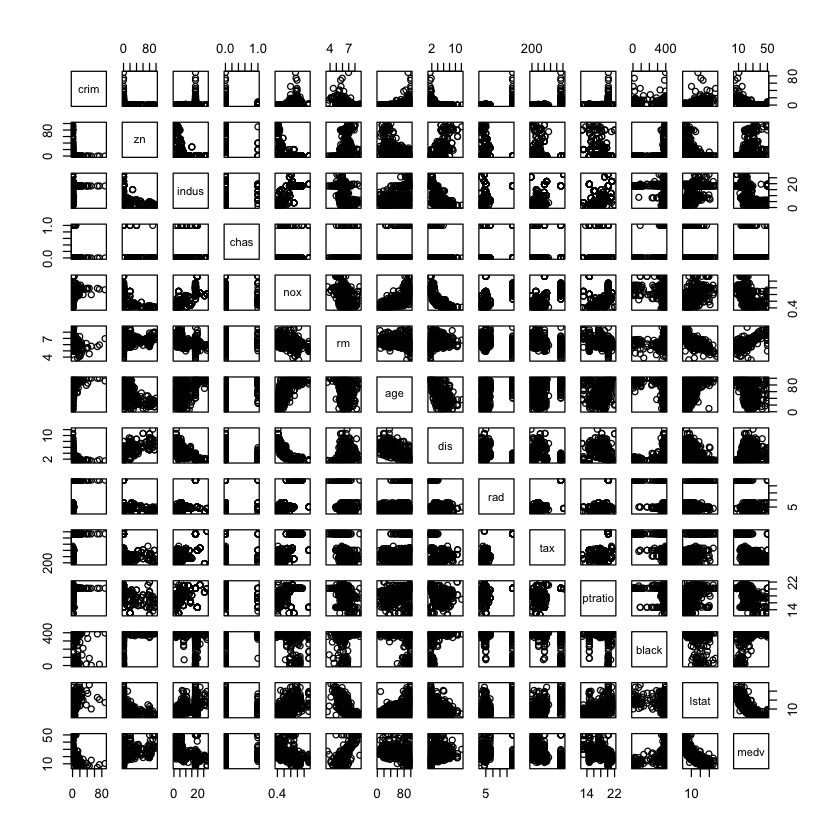

In [45]:
pairs(Boston)
# check correlations

(c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

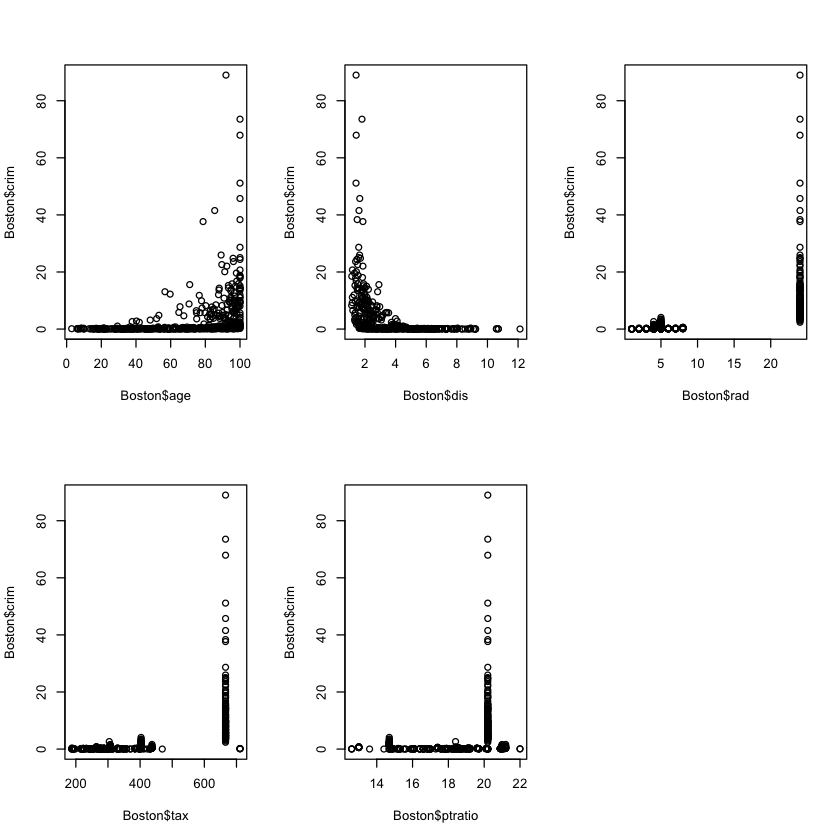

In [51]:
par(mfrow=c(2,3))
plot(Boston$age, Boston$crim) # Older homes, more crime
plot(Boston$dis, Boston$crim) # Closer to work-area, more crime
plot(Boston$rad, Boston$crim) # Essier access to radial hways, more crime
plot(Boston$tax, Boston$crim) # Higher tax rate, more crime
plot(Boston$ptratio, Boston$crim) # Higher pupil:teacher ratio, more crime

(d) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

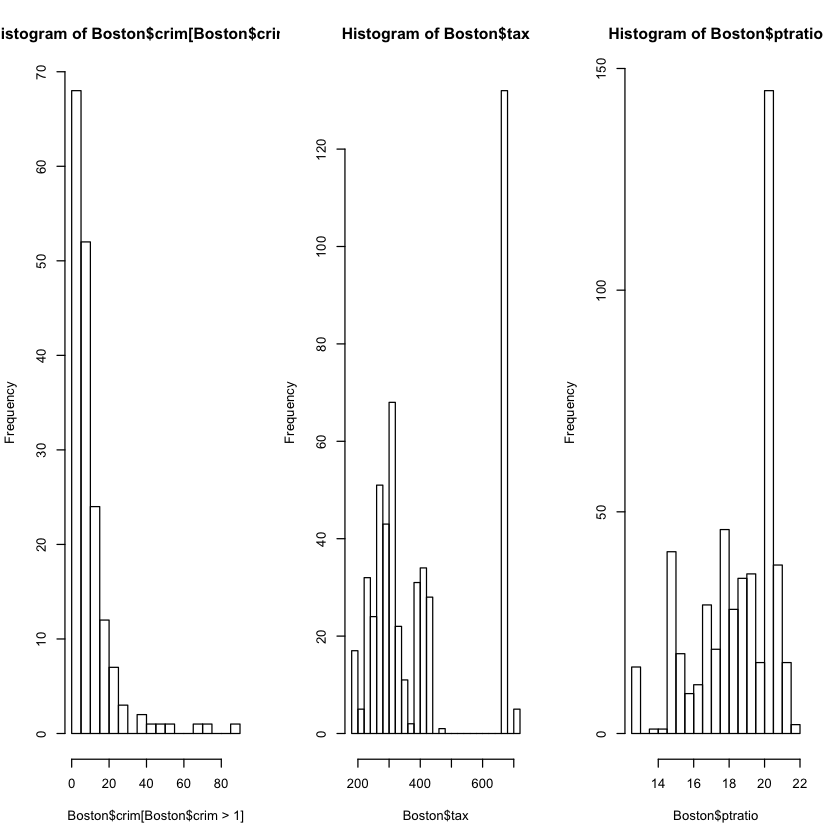

In [55]:
par(mfrow=c(1,3))
hist(Boston$crim[Boston$crim>1], breaks=25) # at least 1 case
# most cities have low crime rates, still certain areas
# have a crime rate > 20, reaching to above 80
hist(Boston$tax, breaks=25)
# seems like two groups
hist(Boston$ptratio, breaks=25)
# skewed towards high ratios

(e) How many of the suburbs in this data set bound the Charles river?

In [58]:
dim(subset(Boston, chas == 1)) # 35

[1] 35 14

(f) What is the median pupil-teacher ratio among the towns in this data set?

In [59]:
median(Boston$ptratio)

[1] 19.05

(g) Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

In [64]:
t(subset(Boston, medv == min(Boston$medv)))
summary(Boston)
# just compare both

,399,406
crim,38.3518,67.9208
zn,0.0000,0.0000
indus,18.1000,18.1000
chas,0.0000,0.0000
nox,0.6930,0.6930
rm,5.4530,5.6830
age,100.0000,100.0000
dis,1.4896,1.4254
rad,24.0000,24.0000
tax,666.0000,666.0000


      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

(h) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [65]:
dim(subset(Boston, rm > 7))
dim(subset(Boston, rm > 8))
summary(subset(Boston, rm > 8))
summary(Boston)
# compare both

[1] 64 14

[1] 13 14

      crim               zn            indus             chas       
 Min.   :0.02009   Min.   : 0.00   Min.   : 2.680   Min.   :0.0000  
 1st Qu.:0.33147   1st Qu.: 0.00   1st Qu.: 3.970   1st Qu.:0.0000  
 Median :0.52014   Median : 0.00   Median : 6.200   Median :0.0000  
 Mean   :0.71879   Mean   :13.62   Mean   : 7.078   Mean   :0.1538  
 3rd Qu.:0.57834   3rd Qu.:20.00   3rd Qu.: 6.200   3rd Qu.:0.0000  
 Max.   :3.47428   Max.   :95.00   Max.   :19.580   Max.   :1.0000  
      nox               rm             age             dis       
 Min.   :0.4161   Min.   :8.034   Min.   : 8.40   Min.   :1.801  
 1st Qu.:0.5040   1st Qu.:8.247   1st Qu.:70.40   1st Qu.:2.288  
 Median :0.5070   Median :8.297   Median :78.30   Median :2.894  
 Mean   :0.5392   Mean   :8.349   Mean   :71.54   Mean   :3.430  
 3rd Qu.:0.6050   3rd Qu.:8.398   3rd Qu.:86.50   3rd Qu.:3.652  
 Max.   :0.7180   Max.   :8.780   Max.   :93.90   Max.   :8.907  
      rad              tax           ptratio          b

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [66]:
Done!

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected '!'
1: Done!
        ^
